In [1]:
import pandas as pd

data = pd.read_csv("data.rated-only.csv")

data.head()

,toknum,tweet,clean,stance,intensity,valence_raw,valence_posnegneu,valence_emonot,valence_emointens,include,...,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date
0,1698,"Honore de Balzac: ""First love is a kind of vac...",honore de balzac first love be a kind of vacci...,NaN,NaN,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '17097525', 'username': 'quotesda...",NaN
1,2073,Next phase of Gardasil vaccination begins: The...,next phase of gardasil vaccination begin the m...,0.0,NaN,0.0,0.0,0.0,0.0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '19480980', 'username': 'radiocha...",NaN
2,2080,RT @CDCemergency: Who should be vaccinated aga...,rt who should be vaccinate against anthrax adv...,0.0,NaN,0.0,0.0,0.0,0.0,1,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '15860016', 'username': '2healthg...",NaN
3,3080,My mother just had her regular doctor's appoin...,my mother just have her regular doctor be appo...,1.0,1.0,1.0,1.0,1.0,1.0,1,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '15420720', 'username': 'GayleHow...",NaN
4,3187,@megnut dirty bath water is like a vaccination,dirty bath water be like a vaccination,-1.0,-1.0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '2984', 'username': 'go'}, {'user...",NaN


In [34]:
stance = data['stance']
#print(stance)

In [38]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline




In [42]:
#let's put some columns in for potential features

#this column counts how many characters in each entry
data['body_len_char'] = data['clean'].apply(lambda x: len(x) - x.count(" "))

#checks if links present in original tweet
data['contains_link'] = [1 if ("http" in phrase) else 0 for phrase in data['tweet'] ]

#print(data['contains_link'])
#print(data['stance'])


In [53]:
#here, we can interrogate the data for tweets containing links

#here's the number of tweets labeled pro containing links
data['link_pro'] = [1 if ((data['stance'][i] == 1.0) and (data['contains_link'][i] == 1.0)) else 0 for i in range(len(data['stance']))]
link_pro = sum(data['link_pro'])
print("Number of pro tweets containing links: {}".format(link_pro))

#here's the number of tweets labeled ambiguous containing links
data['link_amb'] = [1 if ((data['stance'][i] == 0.0) and (data['contains_link'][i] == 1.0)) else 0 for i in range(len(data['stance']))]
link_amb = sum(data['link_amb'])
print("Number of ambiguous tweets containing links: {}".format(link_amb))

#here's the number of tweets labeled anti containing links
data['link_anti'] = [1 if ((data['stance'][i] == -1.0) and (data['contains_link'][i] == 1.0)) else 0 for i in range(len(data['stance']))]
link_anti = sum(data['link_anti'])
print("number of anti tweets containing links: {}".format(link_anti))


Number of pro tweets containing links: 464
Number of ambiguous tweets containing links: 637
number of anti tweets containing links: 137


C:\Users\ayala\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


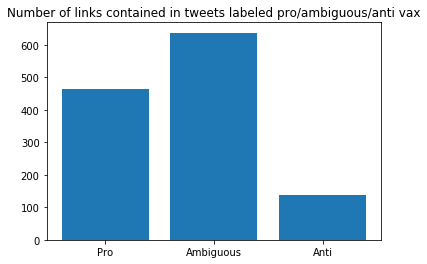

In [66]:
#plotting each of the above

from matplotlib.ticker import FuncFormatter
import numpy as np

x = np.arange(3)
y = [link_pro, link_amb, link_anti]

def values(x, pos):
    return '%1.1d' % (x)

formatter = FuncFormatter(values)
fig, ax = pyplot.subplots()
ax.yaxis.set_major_formatter(formatter)
pyplot.bar(x, y)
pyplot.xticks(x, ('Pro', 'Ambiguous', 'Anti'))
pyplot.title("Number of links contained in tweets labeled pro/ambiguous/anti vax")

pyplot.show()


In [75]:
#let's interrogate the tweet length feature

#here's the length of tweets labeled pro
data['c_len_pro'] = [data['body_len_char'][i] if (data['stance'][i] == 1.0) else 0 for i in range(len(data['body_len_char']))]
c_len_pro_sum = sum(data['c_len_pro'])
num_elems_pro = sum([1 if (value > 0) else 0 for value in data['c_len_pro']])
c_len_pro_avg = int(c_len_pro_sum/num_elems_pro)
print("Average length of pro tweet: {}".format(c_len_pro_avg))

#here's the length of tweets labeled ambiguous
data['c_len_amb'] = [data['body_len_char'][i] if (data['stance'][i] == 0.0) else 0 for i in range(len(data['body_len_char']))]
c_len_amb_sum = sum(data['c_len_amb'])
num_elems_amb = sum([1 if (value > 0) else 0 for value in data['c_len_amb']])
c_len_amb_avg = int(c_len_amb_sum/num_elems_amb)
print("Average length of ambiguous tweet: {}".format(c_len_amb_avg))

#here's the length of tweets labeled anti
data['c_len_anti'] = [data['body_len_char'][i] if (data['stance'][i] == -1.0) else 0 for i in range(len(data['body_len_char']))]
c_len_anti_sum = sum(data['c_len_anti'])
num_elems_anti = sum([1 if (value > 0) else 0 for value in data['c_len_anti']])
c_len_anti_avg = int(c_len_anti_sum/num_elems_anti)
print("Average length of anti tweet: {}".format(c_len_anti_avg))


Average length of pro tweet: 99
Average length of ambiguous tweet: 72
Average length of anti tweet: 91


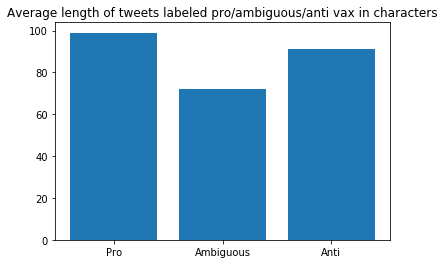

In [79]:
#plotting each of the above

from matplotlib.ticker import FuncFormatter
import numpy as np

x = np.arange(3)
y = [c_len_pro_avg, c_len_amb_avg, c_len_anti_avg]

def values(x, pos):
    return '%1.1d' % (x)

formatter = FuncFormatter(values)
fig, ax = pyplot.subplots()
ax.yaxis.set_major_formatter(formatter)
pyplot.bar(x, y)
pyplot.xticks(x, ('Pro', 'Ambiguous', 'Anti'))
pyplot.title("Average length of tweets labeled pro/ambiguous/anti vax in characters")

pyplot.show()

In [ ]:
#let's explore the intensity feature



In [ ]:
#next features: valence, intensity